# The Sparks Foundation - Data Science Internship

# TASK 5 - Prediction using decision tree

# importing important libraries

In [24]:
import numpy as np
import pandas as pd
import sklearn.metrics as sm
import seaborn as sns
import matplotlib.pyplot as mt
%matplotlib inline

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import plot_tree
from sklearn.metrics import accuracy_score
from matplotlib.pyplot import rcParams

import warnings
warnings.filterwarnings("ignore")

# loading and reading the dataset

In [25]:
dat = pd.read_csv("Iris.csv")
dat

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [26]:
dat.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [27]:
dat.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [28]:
dat.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [29]:
dat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 6.5+ KB


In [8]:
df['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

In [9]:
df.value_counts()

Id   SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  Species        
1    5.1            3.5           1.4            0.2           Iris-setosa        1
95   5.6            2.7           4.2            1.3           Iris-versicolor    1
97   5.7            2.9           4.2            1.3           Iris-versicolor    1
98   6.2            2.9           4.3            1.3           Iris-versicolor    1
99   5.1            2.5           3.0            1.1           Iris-versicolor    1
                                                                                 ..
51   7.0            3.2           4.7            1.4           Iris-versicolor    1
52   6.4            3.2           4.5            1.5           Iris-versicolor    1
53   6.9            3.1           4.9            1.5           Iris-versicolor    1
54   5.5            2.3           4.0            1.3           Iris-versicolor    1
150  5.9            3.0           5.1            1.8           Iris-virginica    

In [30]:
dat.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

# data visualization

<AxesSubplot:>

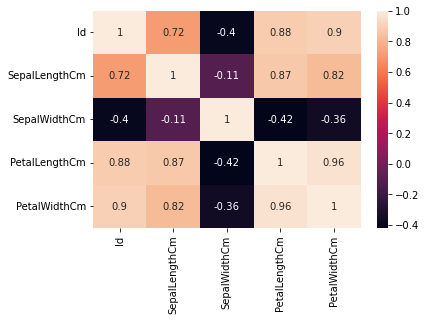

In [31]:
sns.heatmap(dat.corr(),annot=True)

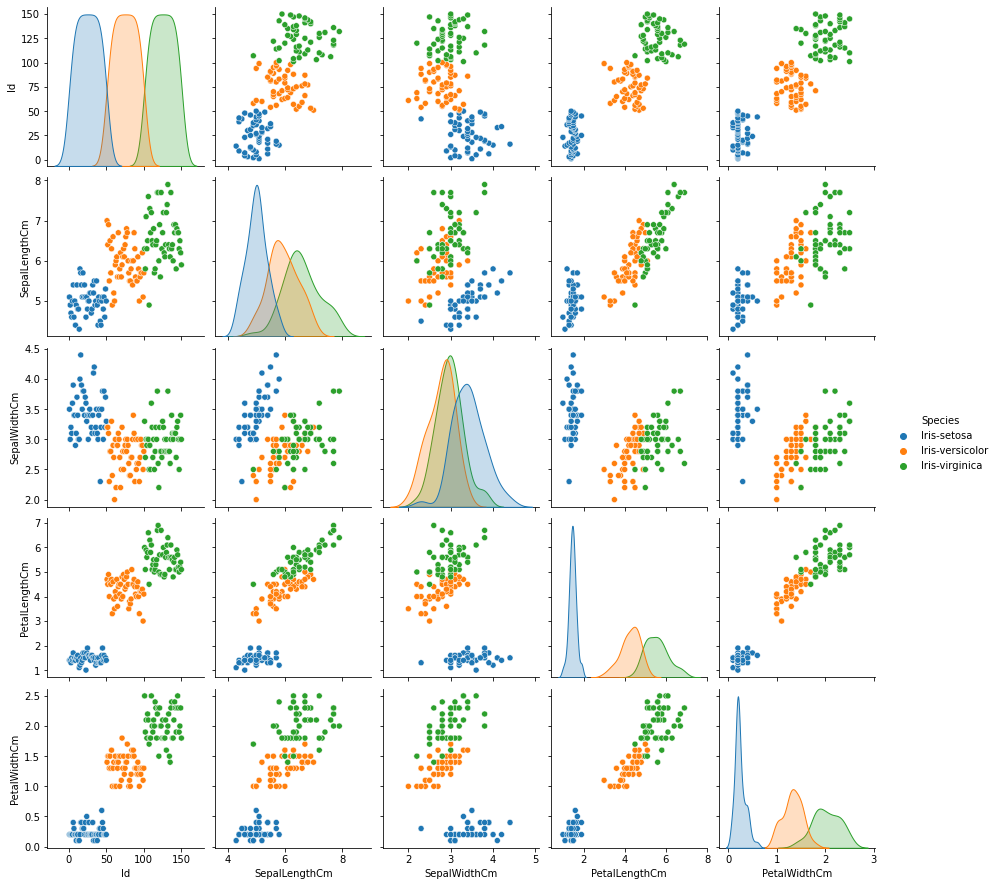

In [33]:
sns.pairplot(dat, hue = 'Species')

In [34]:
x=dat.iloc[:,[0,1,2,3]]
y=dat.Species
y
dat.shape

(150, 6)

In [35]:
x.shape

(150, 4)

In [36]:
y.shape

(150,)

# Train,Test,Split

In [37]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [38]:
x_train.shape

(120, 4)

In [39]:
x_test.shape

(30, 4)

# Dession tree

In [40]:
clf = DecisionTreeClassifier(criterion='entropy')

In [41]:
clf.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy')

In [42]:
y_pred_train = clf.predict(x_train)
y_pred_test = clf.predict(x_test)

In [43]:
pd.DataFrame(dat.Species).value_counts()

Species        
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64

In [44]:
accuracy_score(y_train, y_pred_train)

1.0

In [45]:
accuracy_score(y_test, y_pred_test)

1.0

[Text(0.4, 0.8333333333333334, 'X[3] <= 2.45\nentropy = 1.58225\nsamples = 120\nvalue = [40, 43, 37]'),
 Text(0.2, 0.5, 'entropy = 0.0\nsamples = 40\nvalue = [40, 0, 0]'),
 Text(0.6, 0.5, 'X[0] <= 100.5\nentropy = 0.99594\nsamples = 80\nvalue = [0, 43, 37]'),
 Text(0.4, 0.16666666666666666, 'entropy = 0.0\nsamples = 43\nvalue = [0, 43, 0]'),
 Text(0.8, 0.16666666666666666, 'entropy = 0.0\nsamples = 37\nvalue = [0, 0, 37]')]

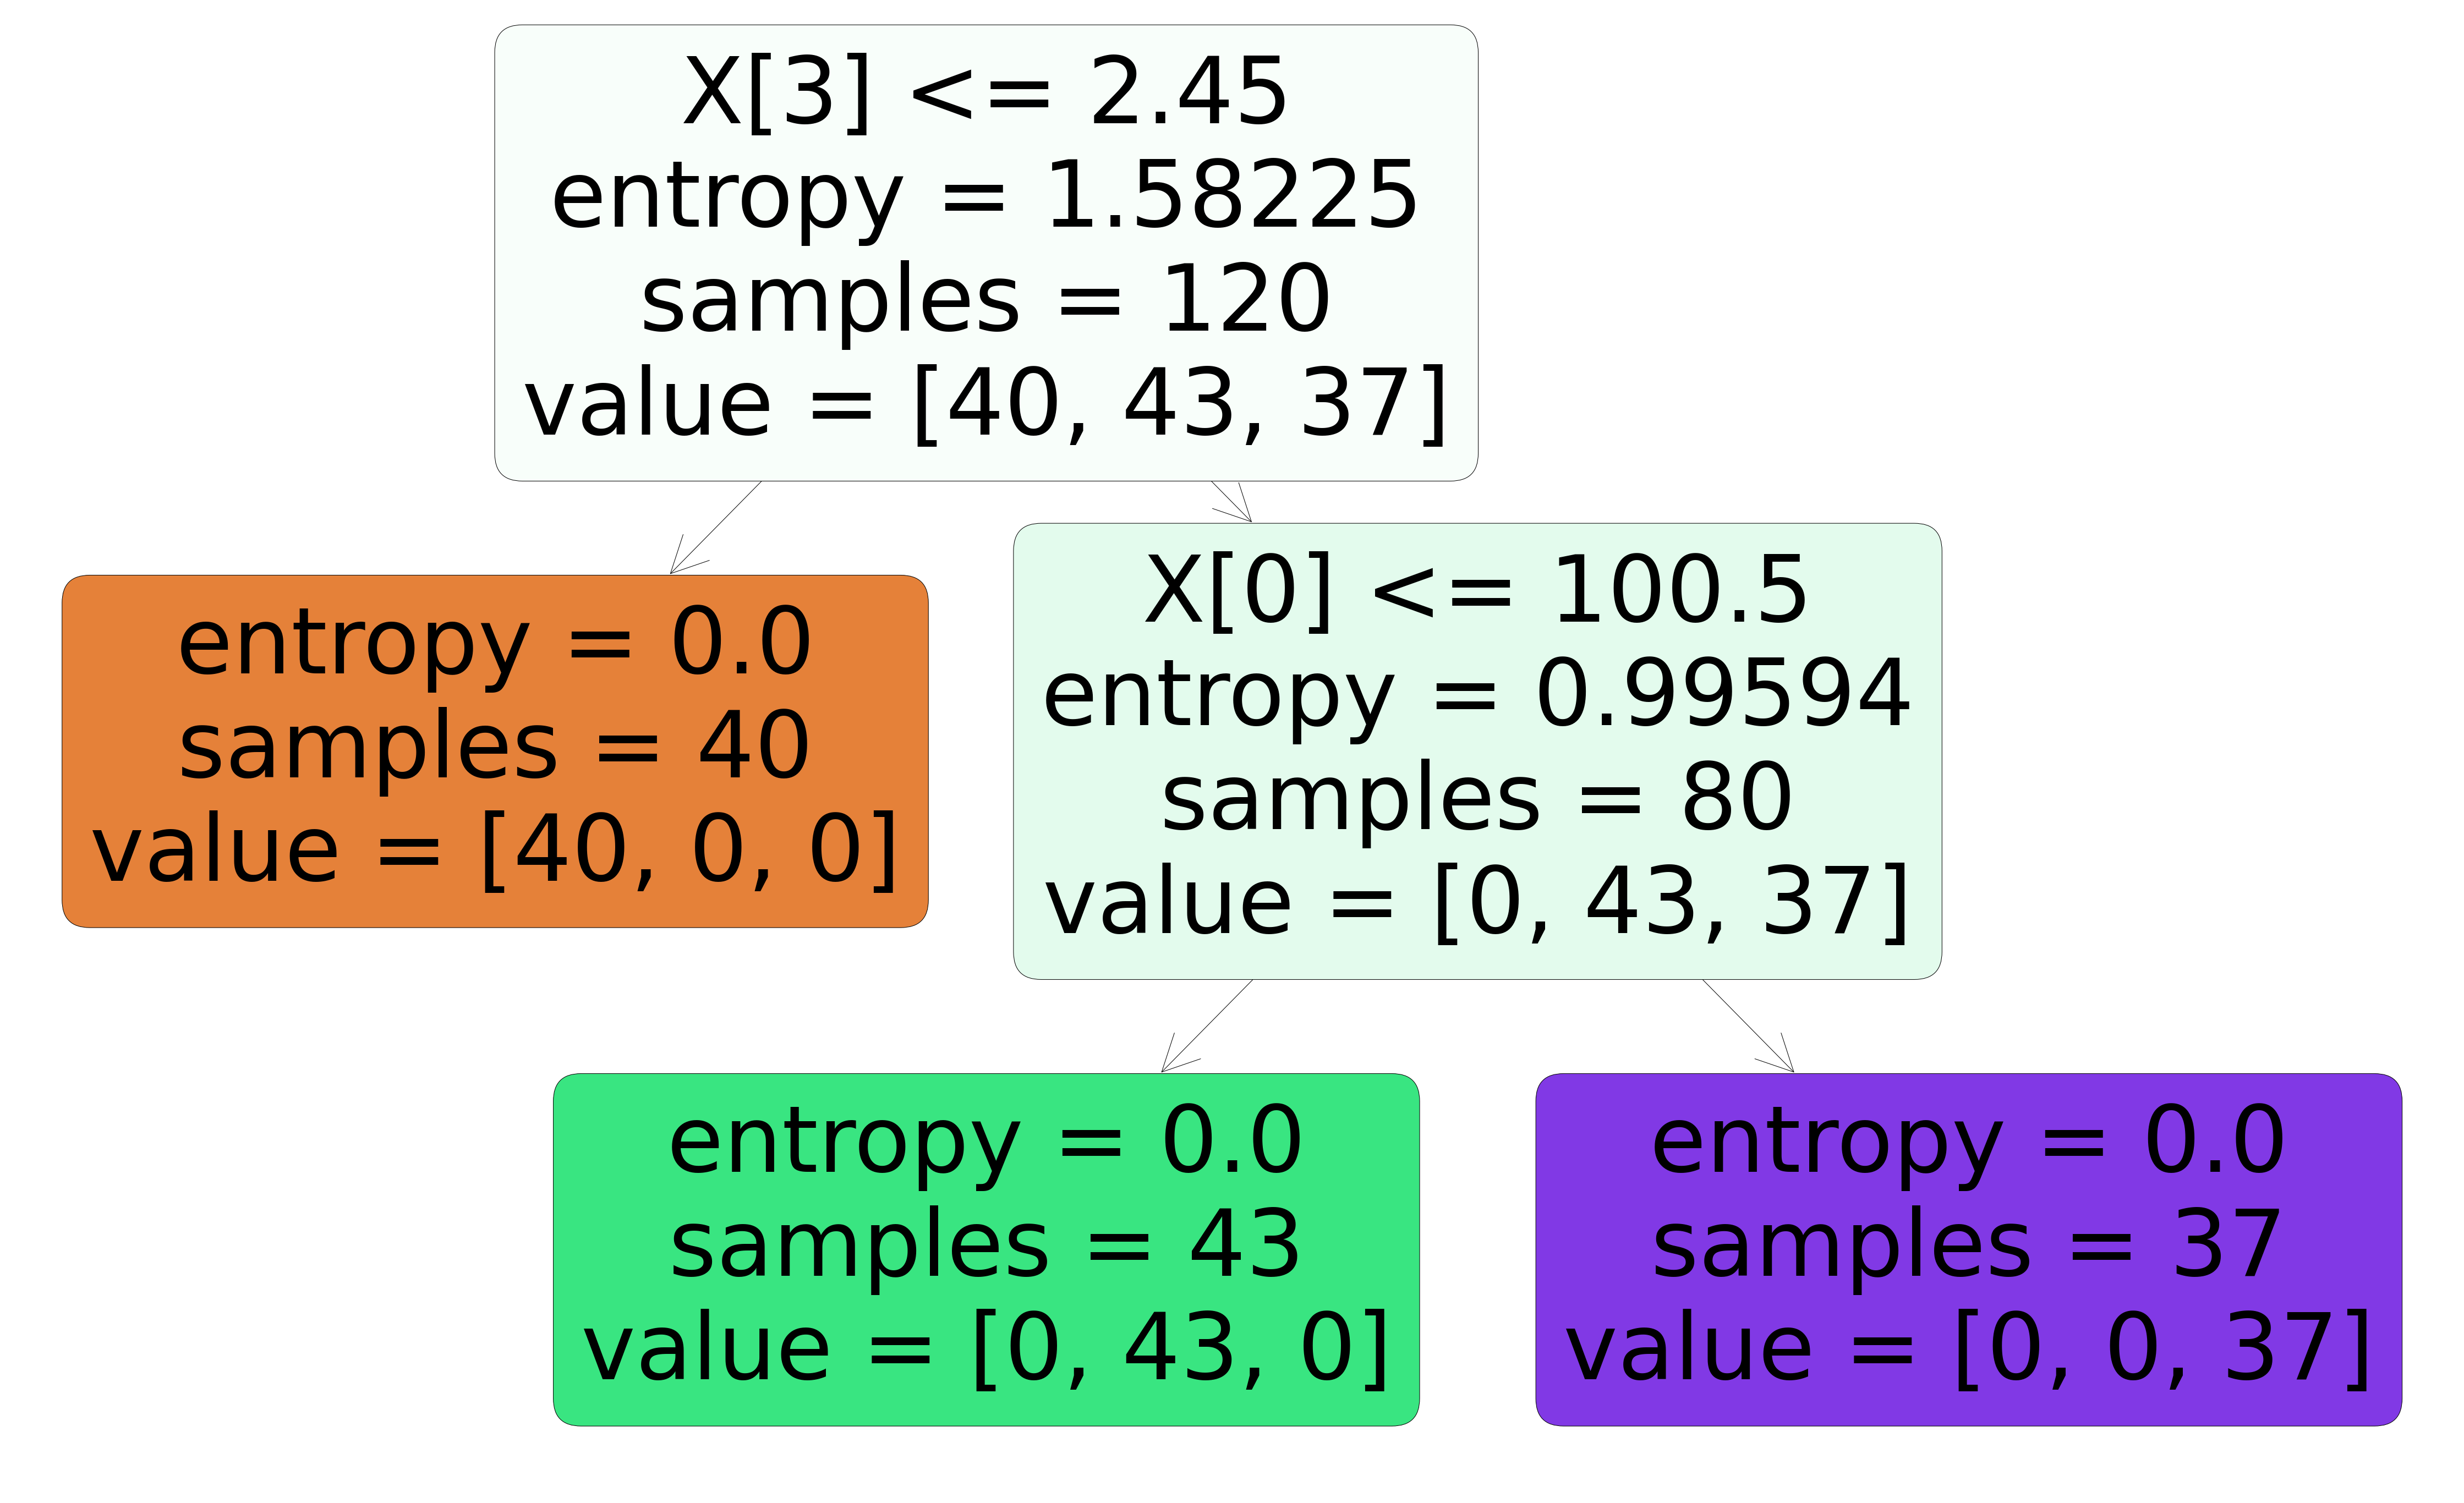

In [46]:
rcParams['figure.figsize'] = 80,50
plot_tree(clf,precision=5,rounded=True,filled=True)

# Thank you